<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Visualizing Random Image

In [21]:
import matplotlib.pyplot as plt
import random
def visualize_random_image(data):
  x,y = data
  index = random.randint(0,len(x))
  print(x[index].shape)
  plt.imshow(x[index],cmap = "gray")
  plt.title("Digit:{}".format(y[index]))
  plt.axis('off')

(28, 28)


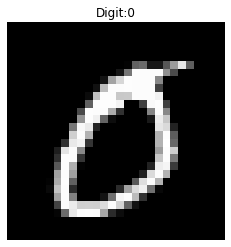

In [22]:
visualize_random_image((x_train,y_train))

In [13]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train/= 255
x_test/=255

In [14]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Model 0 : Simple CNN

In [16]:
from tensorflow.keras import layers

In [34]:
model_0 = tf.keras.Sequential([
  layers.Conv2D(filters = 32,kernel_size = (3,3),input_shape = (28,28,1),activation = "relu"),
  layers.Conv2D(32,3,activation = "relu"),
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(10,activation = "softmax")
  ]
)

In [37]:
model_0.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [ ]:
history_0 = model_0.fit(x_train,y_train,epochs = 5,validation_data = (x_test,y_test),steps_per_epoch = len(x_train),validation_steps = int(0.2*len(x_test)))